In [2]:
import os
import pandas as pd
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
corpus_dir = "/Users/liuzhixin/Documents/硕士研究生/课程文件/第二学期/文本数据挖掘/外交部发言文稿（按文档）"

In [4]:
stopwords_file = "/Users/liuzhixin/Documents/硕士研究生/课程文件/第二学期/文本数据挖掘/workshop1/stopwords.txt"
with open(stopwords_file, 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f]

In [5]:
file_contents = []
for filename in os.listdir(corpus_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(corpus_dir, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            content = file.read()
            file_contents.append(content)

In [6]:
def word_segmentation(text):
    words = jieba.lcut(text)
    # 过滤停用词
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

In [7]:
processed_text = [word_segmentation(text) for text in file_contents]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/qy/l6pd6hxj5gn51xzk2nltjm2h0000gn/T/jieba.cache
Loading model cost 0.466 seconds.
Prefix dict has been built successfully.


In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_text)
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (1000, 35803)


In [9]:
feature_words = vectorizer.get_feature_names_out()
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))
len(word_freq)

35803

In [12]:
top_features = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:100]
print("频数计数结果:")
for feature, freq in top_features:
    print(f"{feature}: {freq}")

频数计数结果:
中国: 29018
中方: 23649
美国: 11449
国家: 11226
国际: 10314
合作: 10264
发展: 9700
对此: 7283
美方: 6671
有何: 6599
评论: 5743
疫情: 5735
全球: 5260
世界: 4638
社会: 4374
报道: 4327
汪文斌: 4285
推动: 3948
维护: 3906
关系: 3886
经济: 3874
支持: 3838
人民: 3771
赵立坚: 3742
和平: 3638
稳定: 3629
地区: 3506
提供: 3487
一个: 3178
组织: 3098
政治: 3072
人权: 3013
反对: 2976
外长: 2877
外交部: 2866
发言人: 2749
各国: 2748
联合国: 2689
原则: 2676
相关: 2638
希望: 2594
企业: 2519
主席: 2515
情况: 2511
新冠: 2504
作出: 2424
总统: 2391
各方: 2373
立场: 2354
香港: 2215
发布: 2208
疫苗: 2179
介绍: 2177
台湾: 2155
停止: 2145
包括: 2111
阿富汗: 2053
会议: 1994
日本: 1948
新疆: 1947
习近平: 1929
领域: 1883
利益: 1864
媒体: 1857
毛宁: 1833
抗疫: 1789
持续: 1744
推进: 1742
对话: 1740
应对: 1737
进一步: 1705
领导人: 1700
措施: 1697
报告: 1693
信息: 1670
肺炎: 1641
工作: 1638
请问: 1624
提出: 1620
解决: 1606
回应: 1579
提到: 1560
战略: 1559
世卫: 1536
一道: 1528
乌克兰: 1526
沟通: 1508
中国政府: 1499
倡议: 1494
始终: 1485
活动: 1477
政策: 1471
病毒: 1471
非洲: 1467
王毅: 1462
共识: 1455
坚定: 1452
作用: 1444
总理: 1441
政府: 1437


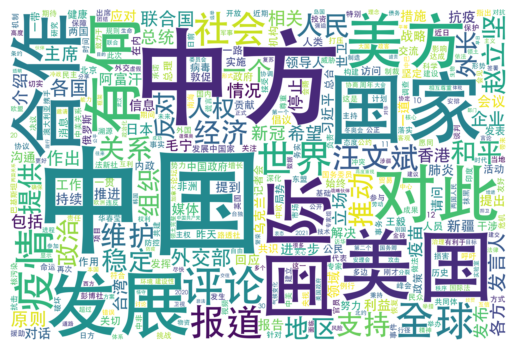

In [13]:
wordcloud = WordCloud(
    font_path="/Library/Fonts/STHeiti Medium.ttc",
    background_color='white', 
    width=2400,
    height=1600,
    max_words=400,  
    stopwords=stopwords  
).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.pdf", format="pdf", dpi=300)  
plt.show()